In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset:
Here I used titanic dataset.

In [20]:
data = pd.read_csv("titanic.csv", usecols=['Survived', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked'])
data.head()

,Survived,Sex,Age,Fare,Cabin,Embarked
0,0,male,22.0,7.2500,NaN,S
1,1,female,38.0,71.2833,C85,C
2,1,female,26.0,7.9250,NaN,S
3,1,female,35.0,53.1000,C123,S
4,0,male,35.0,8.0500,NaN,S


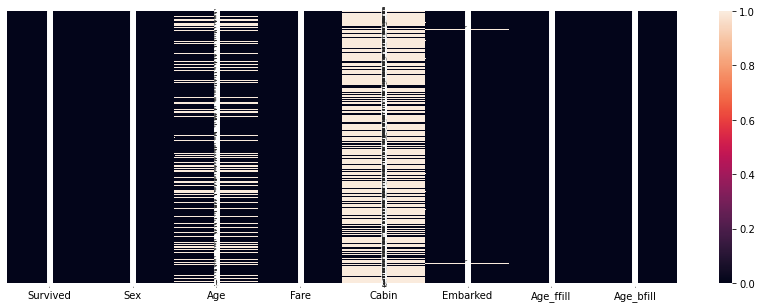

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), yticklabels=False, annot=True)
plt.show()

In [21]:
data.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data.dtypes

Survived      int64
Sex          object
Age         float64
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Impute with ffill and bfill

In [24]:
def impute_null(data, method, cols):
  data[cols + '_' + method] = data[cols].fillna(method=method)


In [26]:
impute_null(data, 'ffill', 'Age')
impute_null(data, 'bfill', 'Age')
data.head(10)

,Survived,Sex,Age,Fare,Cabin,Embarked,Age_ffill,Age_bfill
0,0,male,22.0,7.2500,NaN,S,22.0,22.0
1,1,female,38.0,71.2833,C85,C,38.0,38.0
2,1,female,26.0,7.9250,NaN,S,26.0,26.0
3,1,female,35.0,53.1000,C123,S,35.0,35.0
4,0,male,35.0,8.0500,NaN,S,35.0,35.0
5,0,male,NaN,8.4583,NaN,Q,35.0,54.0
6,0,male,54.0,51.8625,E46,S,54.0,54.0
7,0,male,2.0,21.0750,NaN,S,2.0,2.0
8,1,female,27.0,11.1333,NaN,S,27.0,27.0
9,1,female,14.0,30.0708,NaN,C,14.0,14.0


In [33]:
data.Age.std(), data.Age_ffill.std(), data.Age_bfill.std()

(14.526497332334044, 14.554589813600963, 14.59766765730238)

In [30]:
data.isnull().sum()

Survived       0
Sex            0
Age          177
Fare           0
Cabin        687
Embarked       2
Age_ffill      0
Age_bfill      0
dtype: int64

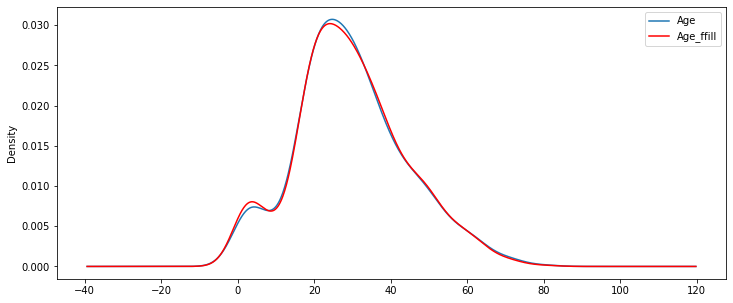

In [32]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_ffill'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

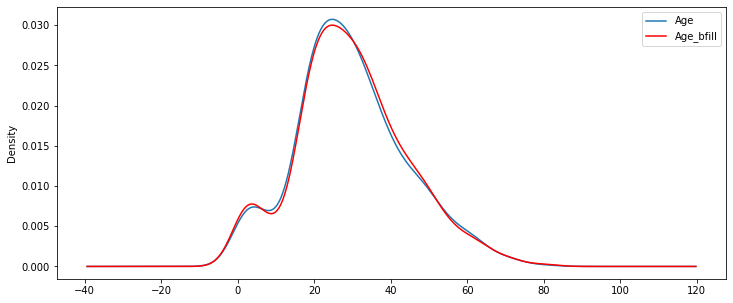

In [34]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_bfill'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# Impute with mean(), median(), mode():

In [60]:
def impute_null(data, method, cols):
  if method == "mean":
    data[cols + '_' + method] = data[cols].fillna(data[cols].mean())
  
  if method == 'median':
    data[cols + '_' + method] = data[cols].fillna(data[cols].median())
  
  if method == 'mode':
    data[cols + '_' + method] = data[cols].fillna(24) # as mode = 24
    

In [61]:
impute_null(data, 'mean', 'Age')
impute_null(data, 'median', 'Age')
impute_null(data, 'mode', 'Age')
data.head(10)

,Survived,Sex,Age,Fare,Cabin,Embarked,Age_ffill,Age_bfill,Age_mean,Age_median,Age_mode
0,0,male,22.0,7.2500,NaN,S,22.0,22.0,22.000000,22.0,22.0
2,1,female,26.0,7.9250,NaN,S,26.0,26.0,26.000000,26.0,26.0
3,1,female,35.0,53.1000,C123,S,35.0,35.0,35.000000,35.0,35.0
4,0,male,35.0,8.0500,NaN,S,35.0,35.0,35.000000,35.0,35.0
5,0,male,NaN,8.4583,NaN,Q,35.0,54.0,29.687475,28.0,24.0
6,0,male,54.0,51.8625,E46,S,54.0,54.0,54.000000,54.0,54.0
7,0,male,2.0,21.0750,NaN,S,2.0,2.0,2.000000,2.0,2.0
8,1,female,27.0,11.1333,NaN,S,27.0,27.0,27.000000,27.0,27.0
9,1,female,14.0,30.0708,NaN,C,14.0,14.0,14.000000,14.0,14.0
10,1,female,4.0,16.7000,G6,S,4.0,4.0,4.000000,4.0,4.0


In [62]:
data.isnull().sum()

Survived        0
Sex             0
Age           177
Fare            0
Cabin         687
Embarked        2
Age_ffill       0
Age_bfill       0
Age_mean        0
Age_median      0
Age_mode        0
dtype: int64

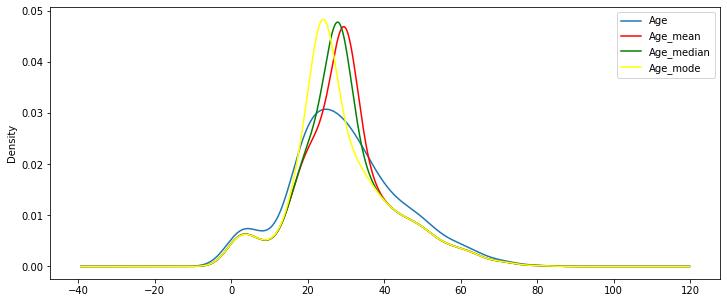

In [63]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_mean'].plot(kind='kde', ax=ax, color='red')
data['Age_median'].plot(kind='kde', ax=ax, color='green')
data['Age_mode'].plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# Impute the NaN with random values

In [79]:
def impute_null_with_random(data, method, cols):
  data[cols + '_' + method] = data[cols]
  random_sample=data[cols].dropna().sample(data[cols].isnull().sum(), random_state=0)
  random_sample.index = data[data[cols].isnull()].index
  data.loc[data[cols].isnull(),cols + '_' + method] = random_sample


In [80]:
impute_null_with_random(data, 'random', 'Age')
data.head(10)

,Survived,Sex,Age,Fare,Cabin,Embarked,Age_ffill,Age_bfill,Age_mean,Age_median,Age_mode,Age_random
0,0,male,22.0,7.2500,NaN,S,22.0,22.0,22.000000,22.0,22.0,22.0
2,1,female,26.0,7.9250,NaN,S,26.0,26.0,26.000000,26.0,26.0,26.0
3,1,female,35.0,53.1000,C123,S,35.0,35.0,35.000000,35.0,35.0,35.0
4,0,male,35.0,8.0500,NaN,S,35.0,35.0,35.000000,35.0,35.0,35.0
5,0,male,NaN,8.4583,NaN,Q,35.0,54.0,29.687475,28.0,24.0,28.0
6,0,male,54.0,51.8625,E46,S,54.0,54.0,54.000000,54.0,54.0,54.0
7,0,male,2.0,21.0750,NaN,S,2.0,2.0,2.000000,2.0,2.0,2.0
8,1,female,27.0,11.1333,NaN,S,27.0,27.0,27.000000,27.0,27.0,27.0
9,1,female,14.0,30.0708,NaN,C,14.0,14.0,14.000000,14.0,14.0,14.0
10,1,female,4.0,16.7000,G6,S,4.0,4.0,4.000000,4.0,4.0,4.0


In [81]:
data.isnull().sum()

Survived        0
Sex             0
Age           177
Fare            0
Cabin         687
Embarked        2
Age_ffill       0
Age_bfill       0
Age_mean        0
Age_median      0
Age_mode        0
Age_random      0
dtype: int64

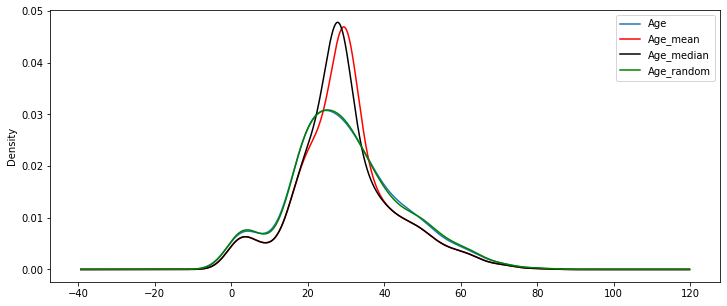

In [84]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_mean'].plot(kind='kde', ax=ax, color='red')
data['Age_median'].plot(kind='kde', ax=ax, color='black')
data['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

# **Arbitrary Value Imputation:**

In [94]:
def impute_null_with_arbitary(data, value, cols):
  data[cols + '_Arbitary_val_' + str(value)] = data[cols].fillna(value)


In [95]:
impute_null_with_arbitary(data, 80, 'Age')
data.head(10)

,Survived,Sex,Age,Fare,Cabin,Embarked,Age_ffill,Age_bfill,Age_mean,Age_median,Age_mode,Age_random,Age_Arbitary_val_80
0,0,male,22.0,7.2500,NaN,S,22.0,22.0,22.000000,22.0,22.0,22.0,22.0
2,1,female,26.0,7.9250,NaN,S,26.0,26.0,26.000000,26.0,26.0,26.0,26.0
3,1,female,35.0,53.1000,C123,S,35.0,35.0,35.000000,35.0,35.0,35.0,35.0
4,0,male,35.0,8.0500,NaN,S,35.0,35.0,35.000000,35.0,35.0,35.0,35.0
5,0,male,NaN,8.4583,NaN,Q,35.0,54.0,29.687475,28.0,24.0,28.0,80.0
6,0,male,54.0,51.8625,E46,S,54.0,54.0,54.000000,54.0,54.0,54.0,54.0
7,0,male,2.0,21.0750,NaN,S,2.0,2.0,2.000000,2.0,2.0,2.0,2.0
8,1,female,27.0,11.1333,NaN,S,27.0,27.0,27.000000,27.0,27.0,27.0,27.0
9,1,female,14.0,30.0708,NaN,C,14.0,14.0,14.000000,14.0,14.0,14.0,14.0
10,1,female,4.0,16.7000,G6,S,4.0,4.0,4.000000,4.0,4.0,4.0,4.0


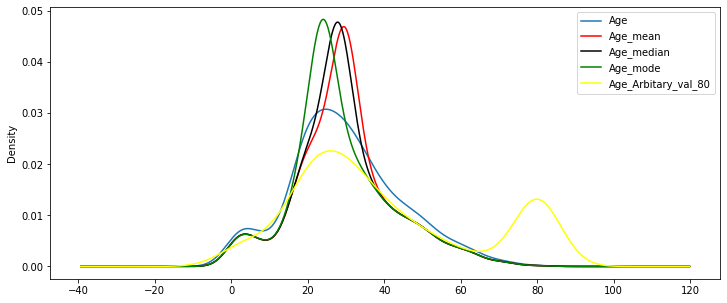

In [97]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data['Age_mean'].plot(kind='kde', ax=ax, color='red')
data['Age_median'].plot(kind='kde', ax=ax, color='black')
data['Age_mode'].plot(kind='kde', ax=ax, color='green')
data['Age_Arbitary_val_80'].plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()